# Assignment 1 - Creating and Manipulating Graphs

Eight employees at a small company were asked to choose 3 movies that they would most enjoy watching for the upcoming company movie night. These choices are stored in the file `assets/Employee_Movie_Choices.txt`.

A second file, `assets/Employee_Relationships.txt`, has data on the relationships between different coworkers. 

The relationship score has value of `-100` (Enemies) to `+100` (Best Friends). A value of zero means the two employees haven't interacted or are indifferent.

Both files are tab delimited.

In [1]:
import networkx as nx
import pandas as pd
import numpy as np

In [2]:
# This is the set of employees
employees = set(['Pablo',
                 'Lee',
                 'Georgia',
                 'Vincent',
                 'Andy',
                 'Frida',
                 'Joan',
                 'Claude'])

# This is the set of movies
movies = set(['The Shawshank Redemption',
              'Forrest Gump',
              'The Matrix',
              'Anaconda',
              'The Social Network',
              'The Godfather',
              'Monty Python and the Holy Grail',
              'Snakes on a Plane',
              'Kung Fu Panda',
              'The Dark Knight',
              'Mean Girls'])


# you can use the following function to plot graphs
# make sure to comment it out before submitting to the autograder
def plot_graph(G, weight_name=None):
    '''
    G: a networkx G
    weight_name: name of the attribute for plotting edge weights (if G is weighted)
    '''
    #%matplotlib notebook
    import matplotlib.pyplot as plt
    
    plt.figure()
    pos = nx.spring_layout(G)
    edges = G.edges()
    weights = None
    
    if weight_name:
        weights = [int(G[u][v][weight_name]) for u,v in edges]
        labels = nx.get_edge_attributes(G,weight_name)
        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
        nx.draw_networkx(G, pos, width=weights);
    else:
        nx.draw_networkx(G, pos,);

### Question 1

Using NetworkX, load in the bipartite graph from `assets/Employee_Movie_Choices.txt` and return that graph.

*This function should return a bipartite networkx graph with 19 nodes and 24 edges*

In [3]:
emp_mv = pd.read_csv(r"assets/Employee_Movie_Choices.txt", delimiter = "\t")

In [4]:
emp_mv.columns

Index(['#Employee', 'Movie'], dtype='object')

In [5]:
emp_mv_graph = nx.from_pandas_edgelist(emp_mv, source = "#Employee", target = "Movie", create_using = nx.Graph())

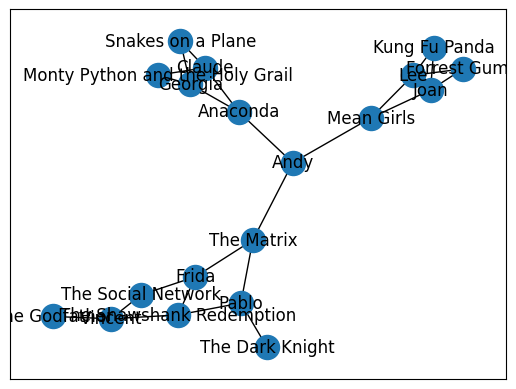

In [6]:
nx.draw_networkx(emp_mv_graph)

In [7]:
type(emp_mv_graph)

networkx.classes.graph.Graph

In [8]:
# emp_mv_graph.add_nodes_from(employees, bipartite = "Employees")
# emp_mv_graph.add_nodes_from(movies, bipartite = "Movies")

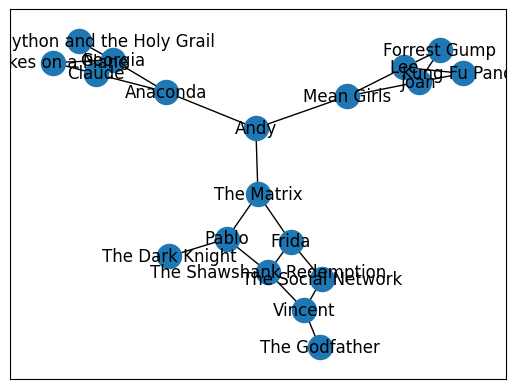

In [9]:
nx.draw_networkx(emp_mv_graph)

In [10]:
len(emp_mv_graph.nodes())

19

In [11]:
len(emp_mv_graph.edges())

24

In [12]:
def answer_one() -> nx.Graph:
    
    emp_mv = pd.read_csv(r"assets/Employee_Movie_Choices.txt", delimiter = "\t")
    emp_mv_graph = nx.from_pandas_edgelist(emp_mv, source = "#Employee", target = "Movie", create_using = nx.Graph())
    return emp_mv_graph

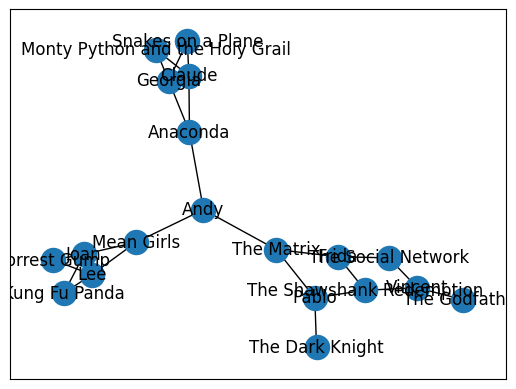

In [13]:
plot_graph(answer_one())

In [14]:
assert type(answer_one()) == nx.Graph , "Your return type should be a Graph object"



### Question 2

Using the graph from the previous question, add nodes attributes named `'type'` where movies have the value `'movie'` and employees have the value `'employee'` and return that graph.

*This function should return a bipartite networkx graph with node attributes `{'type': 'movie'}` or `{'type': 'employee'}`*

In [15]:
def answer_two():
    emp_mv_graph = answer_one()
    emp_mv_graph.add_nodes_from(employees, type = "employee")
    emp_mv_graph.add_nodes_from(movies, type = "movie")
    return emp_mv_graph

In [16]:
nx.get_node_attributes(answer_two(), name = "type")

{'Andy': 'employee',
 'Anaconda': 'movie',
 'Mean Girls': 'movie',
 'The Matrix': 'movie',
 'Claude': 'employee',
 'Monty Python and the Holy Grail': 'movie',
 'Snakes on a Plane': 'movie',
 'Frida': 'employee',
 'The Shawshank Redemption': 'movie',
 'The Social Network': 'movie',
 'Georgia': 'employee',
 'Joan': 'employee',
 'Forrest Gump': 'movie',
 'Kung Fu Panda': 'movie',
 'Lee': 'employee',
 'Pablo': 'employee',
 'The Dark Knight': 'movie',
 'Vincent': 'employee',
 'The Godfather': 'movie'}

In [17]:
assert type(answer_two()) == nx.Graph , "Your return type should be a Graph object"


### Question 3

Find a weighted projection of the graph from `answer_two` which tells us how many movies different pairs of employees have in common.

*This function should return a weighted projected graph.*

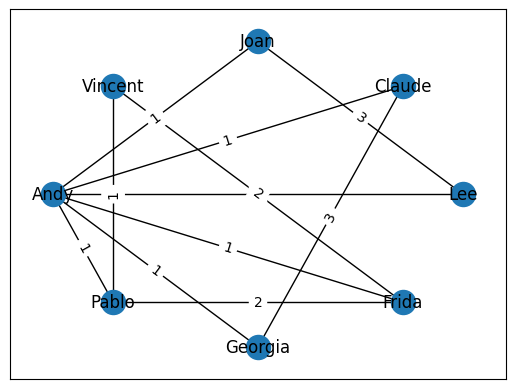

In [18]:
from networkx import bipartite
wproj = bipartite.weighted_projected_graph(answer_two(), nodes = employees)

posit = nx.circular_layout(wproj)
nx.draw_networkx(wproj, pos = posit)
nx.draw_networkx_edge_labels(wproj, pos = posit, edge_labels = nx.get_edge_attributes(wproj, "weight"));

In [19]:
def answer_three():
    from networkx import bipartite
    bproj = bipartite.weighted_projected_graph(answer_two(), nodes = employees)
    return bproj

In [20]:
answer_three().edges(data = True)

EdgeDataView([('Lee', 'Andy', {'weight': 1}), ('Lee', 'Joan', {'weight': 3}), ('Claude', 'Andy', {'weight': 1}), ('Claude', 'Georgia', {'weight': 3}), ('Joan', 'Andy', {'weight': 1}), ('Vincent', 'Pablo', {'weight': 1}), ('Vincent', 'Frida', {'weight': 2}), ('Andy', 'Georgia', {'weight': 1}), ('Andy', 'Pablo', {'weight': 1}), ('Andy', 'Frida', {'weight': 1}), ('Pablo', 'Frida', {'weight': 2})])

EdgeDataView([('Lee', 'Andy', {'weight': 1}), ('Lee', 'Joan', {'weight': 3}), ('Claude', 'Andy', {'weight': 1}), ('Claude', 'Georgia', {'weight': 3}), ('Joan', 'Andy', {'weight': 1}), ('Vincent', 'Pablo', {'weight': 1}), ('Vincent', 'Frida', {'weight': 2}), ('Andy', 'Georgia', {'weight': 1}), ('Andy', 'Pablo', {'weight': 1}), ('Andy', 'Frida', {'weight': 1}), ('Pablo', 'Frida', {'weight': 2})])

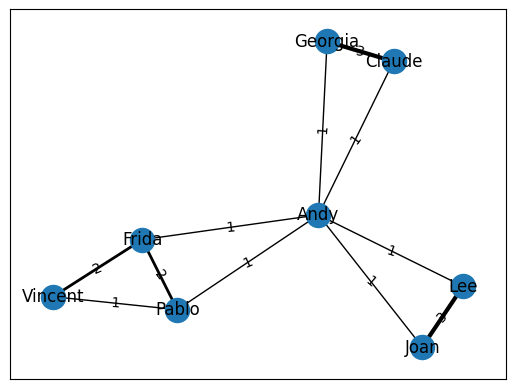

In [21]:
G = answer_three()
plot_graph(G, weight_name="weight")
G.edges(data = True)

In [122]:
assert type(answer_three()) == nx.Graph , "Your return type should be a Graph object"


### Question 4

Suppose you'd like to find out if people that have a high relationship score also like the same types of movies.

Find the pearson correlation between employee relationship scores and the number of movies they have in common. If two employees have no movies in common it should be treated as a 0, not a missing value, and should be included in the correlation calculation.

*This function should return a float.*

In [22]:
emp_rel = pd.read_csv(r"assets/Employee_Relationships.txt", delimiter = "\t", names = ["emp_1", "emp_2", "rel_score"])

In [23]:
emp_rel

,emp_1,emp_2,rel_score
0,Andy,Claude,0
1,Andy,Frida,20
2,Andy,Georgia,-10
3,Andy,Joan,30
4,Andy,Lee,-10
5,Andy,Pablo,-10
6,Andy,Vincent,20
7,Claude,Frida,0
8,Claude,Georgia,90
9,Claude,Joan,0


In [24]:
answer_three().edges(data = True)

EdgeDataView([('Lee', 'Andy', {'weight': 1}), ('Lee', 'Joan', {'weight': 3}), ('Claude', 'Andy', {'weight': 1}), ('Claude', 'Georgia', {'weight': 3}), ('Joan', 'Andy', {'weight': 1}), ('Vincent', 'Pablo', {'weight': 1}), ('Vincent', 'Frida', {'weight': 2}), ('Andy', 'Georgia', {'weight': 1}), ('Andy', 'Pablo', {'weight': 1}), ('Andy', 'Frida', {'weight': 1}), ('Pablo', 'Frida', {'weight': 2})])

In [25]:
proj_graph_data = {
    "emp_1": [],
    "emp_2": [],
    "n_common_movies": []
}

for edge in answer_three().edges(data = True):
    proj_graph_data.get("emp_1").append(edge[0])
    proj_graph_data.get("emp_2").append(edge[1])
    proj_graph_data.get("n_common_movies").append(edge[2].get("weight"))

In [26]:
proj_graph_data

{'emp_1': ['Lee',
  'Lee',
  'Claude',
  'Claude',
  'Joan',
  'Vincent',
  'Vincent',
  'Andy',
  'Andy',
  'Andy',
  'Pablo'],
 'emp_2': ['Andy',
  'Joan',
  'Andy',
  'Georgia',
  'Andy',
  'Pablo',
  'Frida',
  'Georgia',
  'Pablo',
  'Frida',
  'Frida'],
 'n_common_movies': [1, 3, 1, 3, 1, 1, 2, 1, 1, 1, 2]}

In [32]:
proj_df = pd.DataFrame(proj_graph_data).sort_values(["emp_1", "emp_2"])

In [33]:
proj_df

,emp_1,emp_2,n_common_movies
9,Andy,Frida,1
7,Andy,Georgia,1
8,Andy,Pablo,1
2,Claude,Andy,1
3,Claude,Georgia,3
4,Joan,Andy,1
0,Lee,Andy,1
1,Lee,Joan,3
10,Pablo,Frida,2
6,Vincent,Frida,2


In [29]:
emp_rel.head()

,emp_1,emp_2,rel_score
0,Andy,Claude,0
1,Andy,Frida,20
2,Andy,Georgia,-10
3,Andy,Joan,30
4,Andy,Lee,-10


# ***Our job here is to merge these two dataframes where a person being emp_1 or emp_2 should not have any impact on merging as long as two people are connected by a shared movie***

The problem appears to be that in the graph data, the direction did not matter (undirected graph) since the relationship is friendship (symmetric)
but pandas merge function expects the employee columns to be in order..
i.e. it is totally ok for two names to not be in order for us, but not for pandas if it to consider the pair identical
e.g. if "John" is in emp_1 and "Lennon"  in emp_2 in the first dataframe and "Lennon" is in emp_1 and "John" is in emp_1 in the second dataframe
pandas won't consider merging them, but we do want these rows to be merged :(((

In [36]:
np.isnan(np.nan)

True

In [41]:
def fill_df(dframe: pd.DataFrame) -> pd.DataFrame:
    
    emp_relations = pd.read_csv(r"assets/Employee_Relationships.txt", delimiter = "\t", names = ["emp_1", "emp_2", "rel_score"])
    original_emp_pairs = list(zip(emp_relations.emp_1, emp_relations.emp_2))
    data = dframe
    
    employees = list(zip(data.emp_1, data.emp_2))
    
    for reference_row in range(data.shape[0]):
        
        reference_pair = employees[reference_row]
        
        for lookup_offset in range(reference_row, data.shape[0]):
            
            lookup_pair = employees[lookup_offset]
            
            if (reference_pair[0] == lookup_pair[1]) and (reference_pair[1] == lookup_pair[0]):
                
                if np.isnan(data.rel_score[reference_row]):
                    data.rel_score[reference_row] = data.rel_score[lookup_offset]
                elif np.isnan(data.rel_score[lookup_offset]):
                    data.rel_score[lookup_offset] = data.rel_score[reference_row]
                    
                if np.isnan(data.n_common_movies[reference_row]):
                    data.n_common_movies[reference_row] = data.n_common_movies[lookup_offset]
                elif np.isnan(data.n_common_movies[lookup_offset]):
                    data.n_common_movies[lookup_offset] = data.n_common_movies[reference_row]
                    
        if reference_pair not in original_emp_pairs:
            tmp = data.emp_1[reference_row]
            data.emp_1[reference_row] = data.emp_2[reference_row]
            data.emp_2[reference_row] = tmp
                
    return data

In [42]:
df = pd.merge(emp_rel, proj_df, left_on = ["emp_1", "emp_2"], right_on = ["emp_1", "emp_2"], how = "outer")
df.head()

,emp_1,emp_2,rel_score,n_common_movies
0,Andy,Claude,0.0,NaN
1,Andy,Frida,20.0,1.0
2,Andy,Georgia,-10.0,1.0
3,Andy,Joan,30.0,NaN
4,Andy,Lee,-10.0,NaN


In [44]:
fill_df(df).drop_duplicates().fillna(0)

,emp_1,emp_2,rel_score,n_common_movies
0,Andy,Claude,0.0,1.0
1,Andy,Frida,20.0,1.0
2,Andy,Georgia,-10.0,1.0
3,Andy,Joan,30.0,1.0
4,Andy,Lee,-10.0,1.0
5,Andy,Pablo,-10.0,1.0
6,Andy,Vincent,20.0,0.0
7,Claude,Frida,0.0,0.0
8,Claude,Georgia,90.0,3.0
9,Claude,Joan,0.0,0.0


In [88]:
proj_df_swapped

,emp_1,emp_2,n_common_movies
0,Andy,Andy,1
1,Joan,Joan,3
2,Andy,Andy,1
3,Frida,Frida,2
4,Vincent,Vincent,1
5,Joan,Joan,1
6,Claude,Claude,1
7,Georgia,Georgia,1
8,Frida,Frida,1
9,Frida,Frida,2


In [49]:
def answer_four():
    import scipy.stats as stats
    emp_relations = pd.read_csv(r"assets/Employee_Relationships.txt", delimiter = "\t", names = ["emp_1", "emp_2", "rel_score"])

    def fill_df(dframe: pd.DataFrame) -> pd.DataFrame:
    
        
        original_emp_pairs = list(zip(emp_relations.emp_1, emp_relations.emp_2))
        data = dframe

        employees = list(zip(data.emp_1, data.emp_2))

        for reference_row in range(data.shape[0]):

            reference_pair = employees[reference_row]

            for lookup_offset in range(reference_row, data.shape[0]):

                lookup_pair = employees[lookup_offset]

                if (reference_pair[0] == lookup_pair[1]) and (reference_pair[1] == lookup_pair[0]):

                    if np.isnan(data.rel_score[reference_row]):
                        data.rel_score[reference_row] = data.rel_score[lookup_offset]
                    elif np.isnan(data.rel_score[lookup_offset]):
                        data.rel_score[lookup_offset] = data.rel_score[reference_row]

                    if np.isnan(data.n_common_movies[reference_row]):
                        data.n_common_movies[reference_row] = data.n_common_movies[lookup_offset]
                    elif np.isnan(data.n_common_movies[lookup_offset]):
                        data.n_common_movies[lookup_offset] = data.n_common_movies[reference_row]

            if reference_pair not in original_emp_pairs:
                tmp = data.emp_1[reference_row]
                data.emp_1[reference_row] = data.emp_2[reference_row]
                data.emp_2[reference_row] = tmp

        return data
    
    proj_graph_data = {
    "emp_1": [],
    "emp_2": [],
    "n_common_movies": []
    }

    for edge in answer_three().edges(data = True):
        proj_graph_data.get("emp_1").append(edge[0])
        proj_graph_data.get("emp_2").append(edge[1])
        proj_graph_data.get("n_common_movies").append(edge[2].get("weight"))
    
    proj_graph_df = pd.DataFrame(proj_graph_data)
    merge = pd.merge(emp_relations, proj_graph_df, left_on = ["emp_1", "emp_2"], right_on = ["emp_1", "emp_2"], how = "outer")
    
    merge = fill_df(merge).drop_duplicates().fillna(0)
    
    return stats.pearsonr(merge.n_common_movies, merge.rel_score)[0]
    

In [50]:
answer_four()

C:\Users\Anoban\AppData\Local\Temp\ipykernel_1552\640813337.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rel_score[lookup_offset] = data.rel_score[reference_row]
C:\Users\Anoban\AppData\Local\Temp\ipykernel_1552\640813337.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.n_common_movies[reference_row] = data.n_common_movies[lookup_offset]
C:\Users\Anoban\AppData\Local\Temp\ipykernel_1552\640813337.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

0.7883962221733475

In [116]:
ans_four = answer_four()